In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Vivek Chauhan/My  NoteBook/datasets/uber.csv")

Preprocessing Dataset


In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
 df=df.drop(['Unnamed: 0','key'],axis=1)

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.shape

(200000, 7)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Colimn pickup_datetime is in wrong format (object),cinvert it to DateTime format

In [10]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

In [11]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Filling missing value

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)

In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

to seggregate each time of date and time

In [15]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
            day=df.pickup_datetime.dt.day,
            month=df.pickup_datetime.dt.month,
            year=df.pickup_datetime.dt.year,
            dayofweek=df.pickup_datetime.dt.dayofweek)

In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


Here we are going to use Heversine formula to calculate the distance between two points and journey, using the
longitude and latitude values.


In [17]:
from math import *
def distance_transform(longitude1,latitude1,longitude2,latitude2):
    travel_dist=[]

    for i in range (len(longitude1)):
        long1,lati1,long2,lati2=map(radians,[longitude1[i],latitude1[i],longitude2[i],latitude2[i]])
        dist_long=long2-long1
        dist_lati=lati2-lati1
        a=sin(dist_lati/2)**2+cos(lati1)*cos(lati2)*sin(dist_long/2)**2
        c=2*asin(sqrt(a))*6371
        travel_dist.append(c)

    return travel_dist

In [18]:
df['dist_travel_km']=distance_transform(df['pickup_latitude'].to_numpy(),
                                        df['pickup_longitude'].to_numpy(),
                                        df['dropoff_latitude'].to_numpy(),
                                        df['dropoff_longitude'].to_numpy())

In [19]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,0.465181
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,0.678728
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,4.823521
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.261639
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,5.369902


In [20]:
df.drop('pickup_datetime',axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,0.465181
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,0.678728
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,4.823521
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.261639
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,5.369902
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.064177
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,2.442219
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,14.264792
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,1.800095


checking outliera and filling them

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

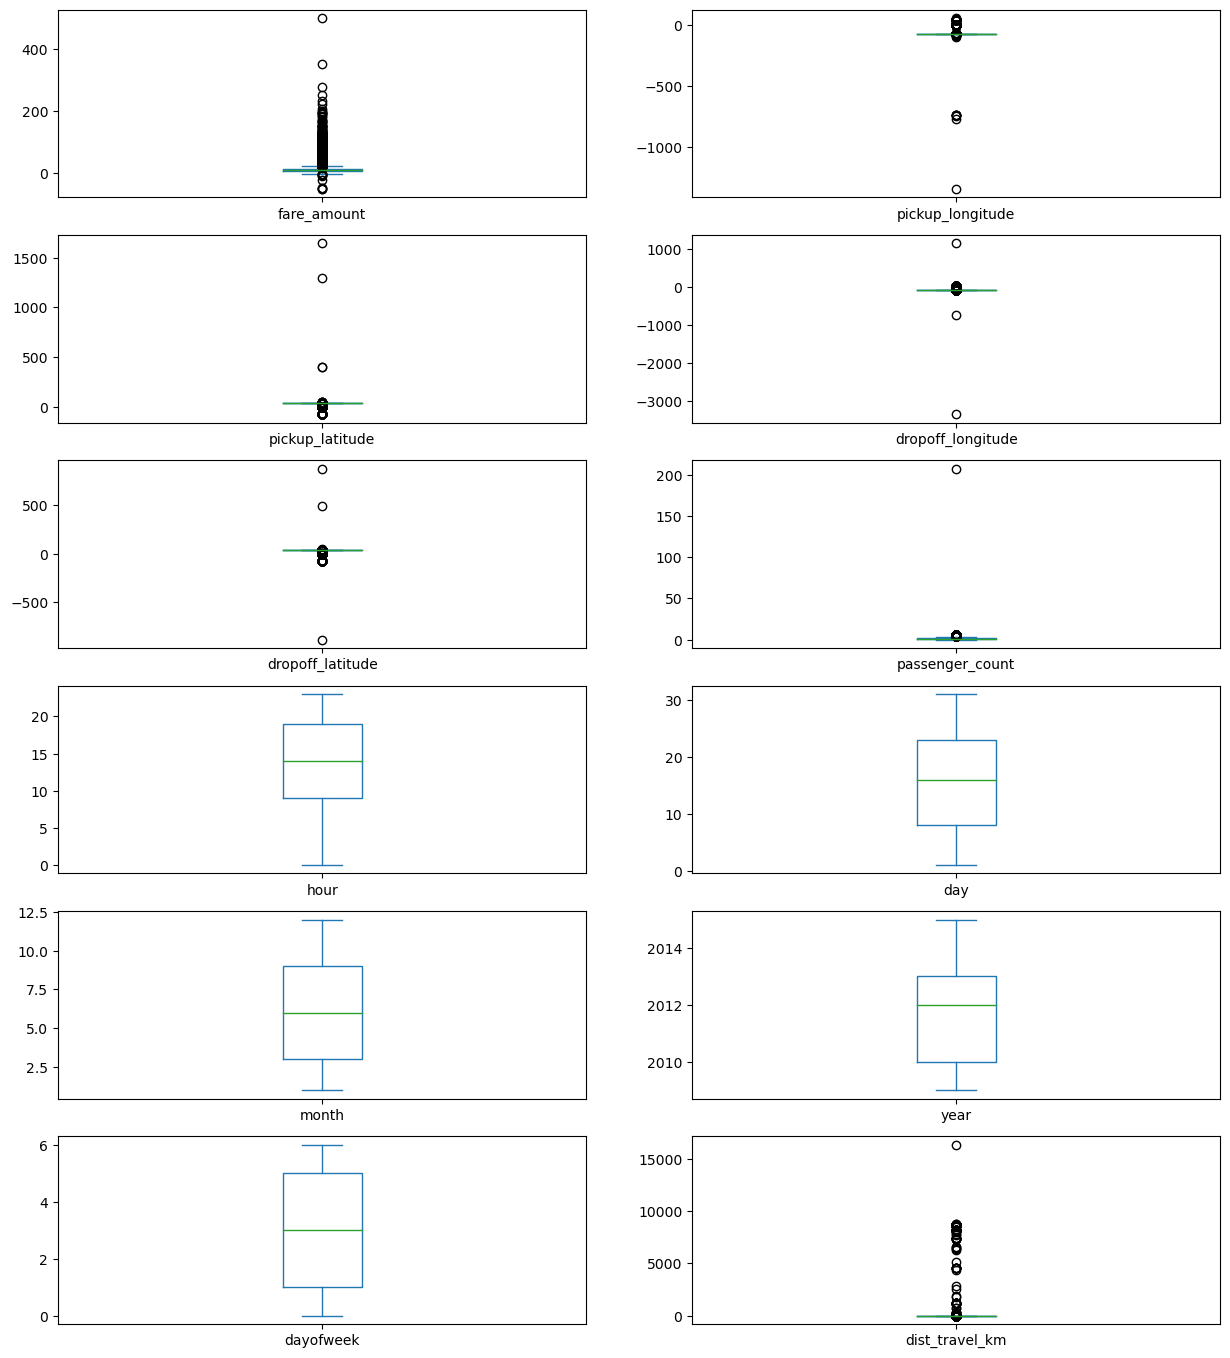

In [21]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

Checking outliera and filling them

In [22]:
def remove_outliers(df1,col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    df[col]=np.clip(df1[col],lower_whisker,upper_whisker)
    return df1


In [23]:
def treat_outlier_all(df1,col_list):
    for c in col_list:
        df1=remove_outliers(df,c)
    return df1

In [24]:
df=treat_outlier_all(df,df.iloc[:,0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

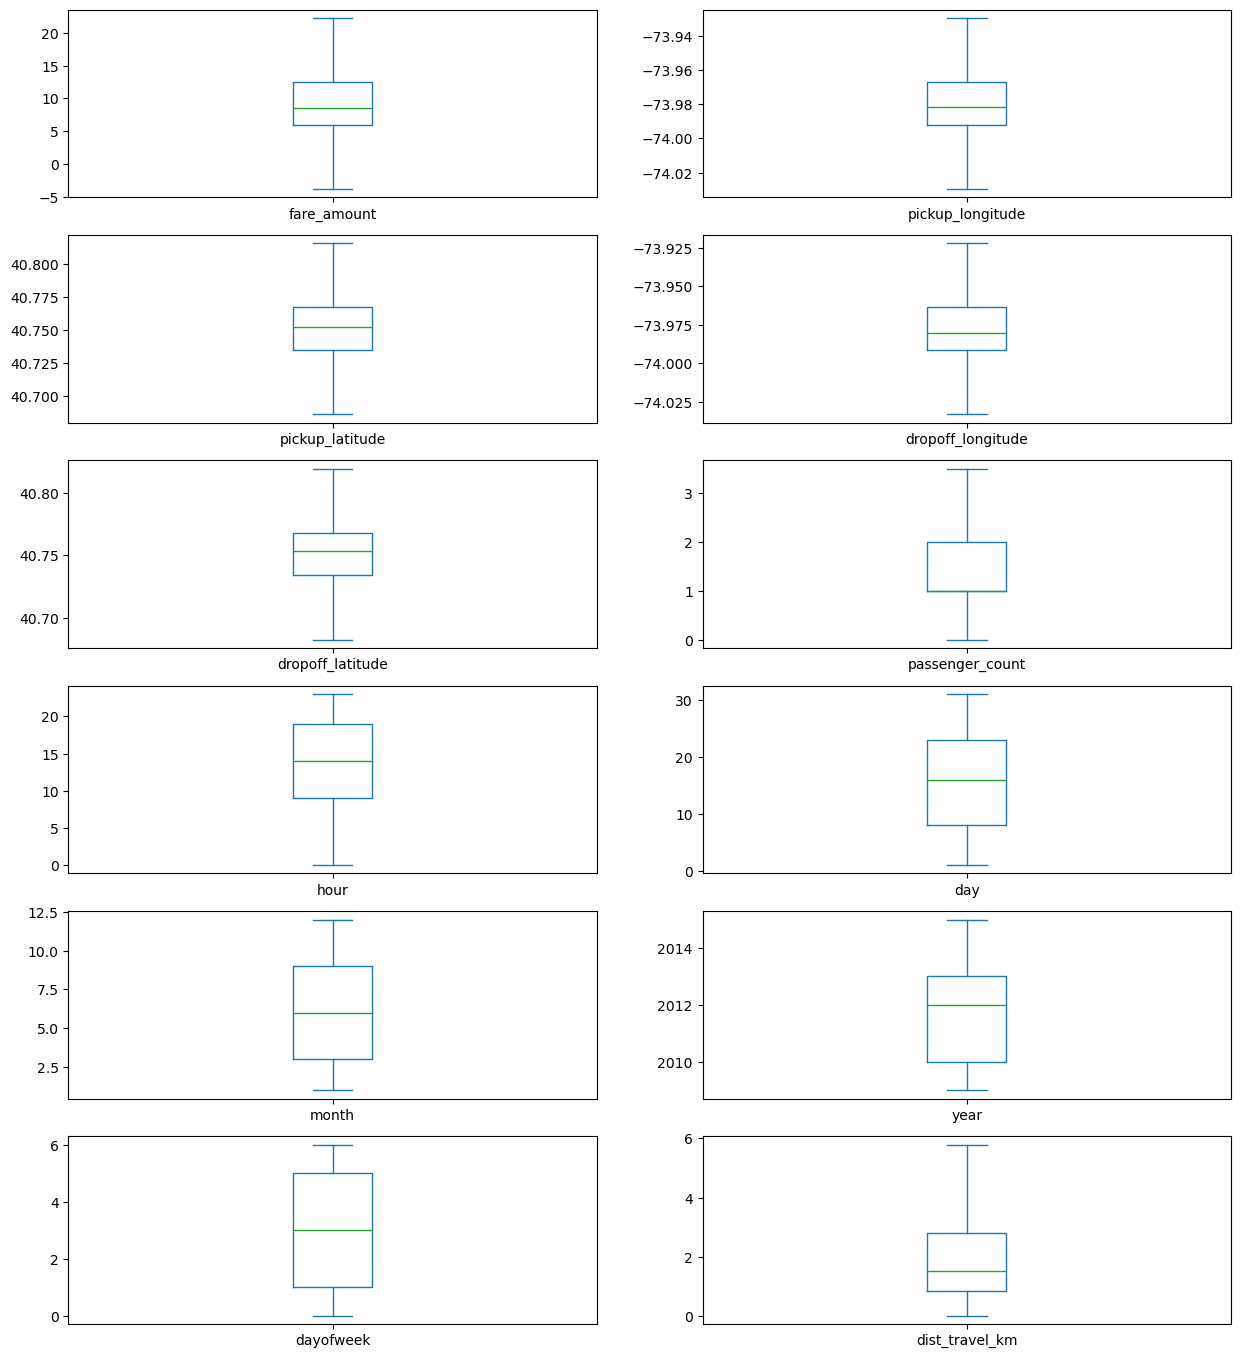

In [25]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [26]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)


Remaining observastions in the dataset: (200000, 13)


In [27]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)]


In [28]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [29]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,0.465181
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,0.678728
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,4.823521
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.261639
4,16.0,2014-08-28 17:47:00+00:00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,5.369902


In [30]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<Axes: >

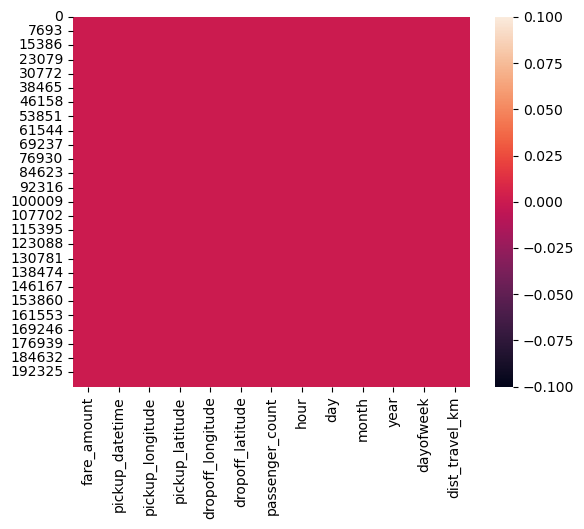

In [31]:
sns.heatmap(df.isnull()) #Free for null values

In [32]:
corr = df.corr() 
corr

C:\Users\vivek\AppData\Local\Temp\ipykernel_12264\3281836264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.762087
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.145322
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.026658
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.253429
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.003851
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.005160
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.049017
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001667
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010423
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.025198


C:\Users\vivek\AppData\Local\Temp\ipykernel_12264\3141023175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)


<Axes: >

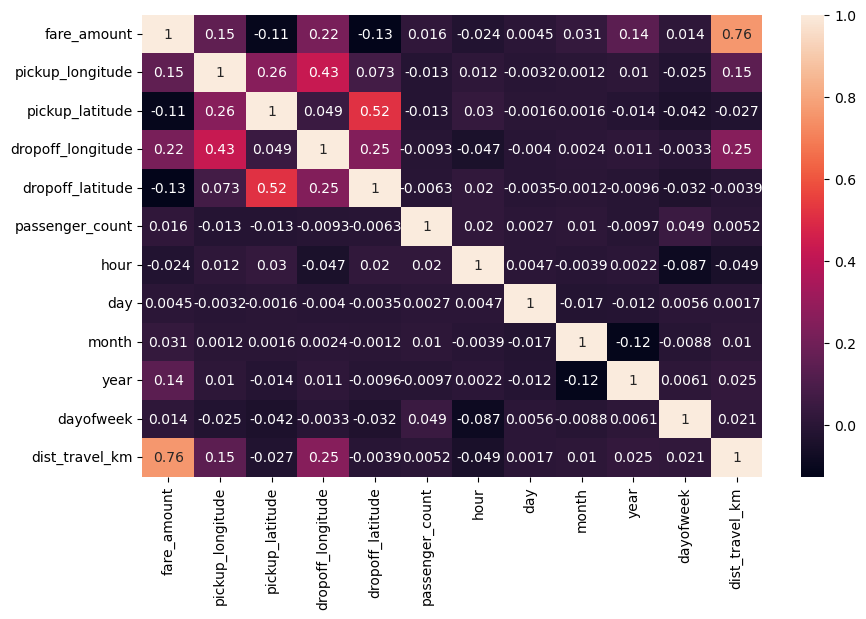

In [33]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

# Dividing the dataset into feature and target values

In [34]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

# Diving the dataset into training and testing dataset

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)



LinearRegression()

In [37]:
regression.intercept_

2204.1318091011713

In [38]:
regression.coef_

array([ 1.27632614e+01, -1.00974068e+01,  9.52583708e+00, -2.11676362e+01,
        8.17722615e-02,  1.40261343e-02,  4.23474014e-03,  5.81674648e-02,
        3.59501155e-01, -1.75855775e-02,  2.43085538e+00])

In [39]:
prediction = regression.predict(X_test)
print(prediction)

[ 4.1587751  14.56171595  6.31608169 ...  7.01098794  8.37730801
 17.71104525]


In [40]:
y_test

177951     4.50
140463     9.70
59071      4.50
109547    13.70
153114    12.90
          ...  
137807    17.30
182262     7.30
155553     4.10
84004     12.00
37339     22.25
Name: fare_amount, Length: 66000, dtype: float64

## Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.625678617607745

In [42]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
MSE

11.193187294892965

In [43]:

RMSE = np.sqrt(MSE)

In [44]:
RMSE

3.34562210880024

# Random Forest regression

In [45]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
y_pred = rf.predict(X_test)
y_pred

array([ 4.906 , 10.157 ,  6.0195, ...,  5.541 , 11.47  , 22.057 ])

## metric evalution for random forest

In [48]:
R2_Random = r2_score(y_test,y_pred)
R2_Random


0.807297859178

In [49]:
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random

5.762297468989349

In [50]:
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random


2.400478591654037